## Transporte de um pulso inicial de poluição numa situação em que o vento seja constante
 Alejandro Delgado Peralta


## Exercicio com aproximação de primeiro ordem, progressivo no tempo e regressivo no espaço.
Temos uma equação da adveção em 1D:

$$
\frac{\partial C}{\partial t} + U*\frac{\partial C}{\partial x} = 0,
$$

A condição inicial (CI) dada por uma gaussiana centrada em i=51, com decaimiento exponencial dado por `nr` (número de pontos) onde a amplitude da perturbação cai de um fator e:

$$
C(x,0) = C_{i,0} = C_0 \exp[\frac{-(i\Delta x - 51\Delta x)^2}{(nr*\Delta x)^2}]
$$

CFL:
$$
U*\frac{\Delta t}{\Delta x} < 1
$$

## Resultados

### Aproximação do ordem 1
Discretização e aproximação numérica, progressiva no tempo e regressiva no espaço:

$$
C^{n+1}_i = C^n_i - U*\frac{\Delta t}{\Delta x}(C^n_i - C^n_{i-1})
$$


560


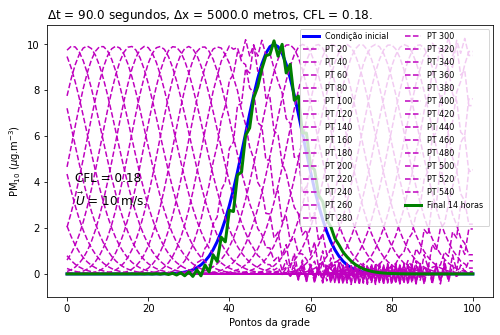

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
from matplotlib import animation, rc
from functions import *
# Condições do exercício
# ----------------------
hora    = 14
tempo   = hora*3600     # segundos
Nx      = 101           # pontos de grade
Nt      = int(hora*40)
print(Nt)
x, dx   = np.linspace(0, (Nx-1)*5000, Nx, retstep = True)
t, dt   = np.linspace(0, tempo, Nt, retstep = True)
U       = 10            # m/s
CFL     = U*dt/dx       # Courant number  CFL = 1, dt = 500

# Tipo de função, aproximação e contorno
# --------------------------------------
fun         =  "Gaussiana"          # Gaussiana, Retângulo
aprox       =  "leapfrog"           # ordem1, ordem4, leapfrog, Matsuno
cond_front  =  "periódica"          # fixa, periódica, radiacional
ylabel      =  "PM$_{10}$ ($\mu$g.m$^{-3}$)"
dP          =  20                  # Intervalo de passo de tempo
nr          =  10

C_ref = sol_analytical(fun, x, U, Nx, Nt, nr, t)
c = sol_num(aprox, cond_front, fun, CFL, nr, Nx, Nt, x, dx, U, t)
plot_sol_num(c, fun, aprox, cond_front, ylabel, dP, hora, Nt, CFL, U, dx, dt)
fig2gif(Nt, dP, dt, CFL, C_ref, c, ylabel, aprox, nr, cond_front, fun)

## Aproximação Leapfrog
Discretização no tempo e espaço das derivadas considerando diferenças centrais como segue:

$$
\frac{C^{n+1}_i - C^{n-1}_i}{2\Delta t} = -U*\frac{C^n_{i+1} - C^n_{i-1}}{2\Delta x}
$$

Se CFL é igual a $\gamma$, então temos

$$
C^{n+1}_i = C^{n-1}_i - \gamma(C^n_{i+1} - C^n_{i-1})
$$

para i = 0, consideramos usar o esquema de aproximação progressiva central no tempo:

$$
\frac{C^{n+1}_i - C^{n}_i}{\Delta t} = -U*\frac{C^n_{i+1} - C^n_{i-1}}{2\Delta x}
$$

Com isso temos

$$
C^{1}_i = C^{0}_i - \frac{\gamma}{2}(C^0_{i+1} - C^0_{i-1})
$$


# Muito obrigado